In [29]:
# define theta_1 and theta_2 the prob that a coin flip lands heads
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import math

In [127]:
# initial distributions for theta_1 and theta_2, beta 

# parameters, lets say theta_1 is unbiased and prior to our data we observed 5 heads and 6 tails.
theta_1 = beta(5,6)

# lets say theta_2 is biased. Prior to our data we observed 10 heads and 4 tails
theta_2 = beta(10,4)


In [175]:
# for theta_1, the data we obtain is 10 heads and 10 tails 
# for theta_2, the data we obtain is 15 heads and 6 tails

# start metropolis hastings. Posterior can be computed analytically as well.

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

def likelihood(theta, trials, heads):
    likelihood = nCr(trials, heads) * (theta**heads) * (1 - theta) ** (trials - heads)
    return likelihood

def log_prior(prior, theta):
    return prior.pdf(theta)

def compute_acceptance_prob(theta_curr, theta_prop, trials, heads, prior):
    # likelihood * prior. Compute the log unnormalized posterior
    # logPost = logLLH + logPrior
#     theta_curr_1 = theta_curr[0]
#     theta_curr_2 = theta_curr[1]
    
#     theta_prop_1 = theta_prop[0]
#     theta_prop_2 = theta_prop[1]
    
#     print(theta_prop_1)
#     print(theta_prop_2)
#     print(theta_curr_1)
#     print(theta_curr_2)
    
#     log_likelihood_theta_curr_1 = log_likeilihood(theta_curr_1, 20, 10) # 20 trials, 10 heads
#     log_likelihood_theta_curr_2 = log_likeilihood(theta_curr_2, 21, 15) # 21 trials, 15 heads
    
#     log_likelihood_theta_prop_1 = log_likeilihood(theta_prop_1, 20, 10) # 20 trials, 10 heads
#     log_likelihood_theta_prop_2 = log_likeilihood(theta_prop_2, 21, 15) # 21 trials, 15 heads
    
    
#     log_prior_curr_1 = log_prior(theta_1, theta_curr_1)
#     log_prior_curr_2 = log_prior(theta_2, theta_curr_2)
    
#     log_prior_prop_1 = log_prior(theta_1, theta_prop_1)
#     log_prior_prop_2 = log_prior(theta_2, theta_prop_2)
    
#     joint_likelihood_curr = log_likelihood_theta_curr_1 + log_likelihood_theta_curr_2
#     joint_likelihood_prop = log_likelihood_theta_prop_1 + log_likelihood_theta_prop_2
    
#     log_post_curr = joint_likelihood_curr + log_prior_curr_1 + log_prior_curr_2
#     log_post_prop = joint_likelihood_prop + log_prior_prop_1 + log_prior_prop_2


    likelihood_theta_curr = likelihood(theta_curr, trials, heads)
    likelihood_theta_prop = likelihood(theta_prop, trials, heads)
    
    prior_curr = log_prior(prior, theta_curr)
    prior_prop = log_prior(prior, theta_prop)
    
    post_curr = likelihood_theta_curr + prior_curr
    post_prop = likelihood_theta_prop + prior_prop
    
    
    return min(1, post_prop / post_curr)


# theta_curr = np.array([np.random.beta(5,6), np.random.beta(10,4)]) # sample from beta 
# print(theta_curr)
# MAX_ITERS = 1000000
# prop_mean = [0,0]
# prop_cov = [[0.05,0],[0,0.05]]
# thetas = []
# for i in range(MAX_ITERS):
#     # sample from gaussian proposal 
#     #print(np.random.multivariate_normal(prop_mean, prop_cov))
#     theta_prop = theta_curr + np.random.multivariate_normal(prop_mean, prop_cov)
    
#     #check theta values
#     theta_1_curr = theta_prop[0]
#     theta_2_curr = theta_prop[1]
    
#     if (theta_1_curr > 1 or theta_1_curr < 0):
#         continue
        
#     if (theta_2_curr > 1 or theta_2_curr < 0):
#         continue
        
#     #print(theta_prop)
#     # evaluate unnormalized posterior
#     prob = compute_acceptance_prob(theta_curr, theta_prop)
#     r = np.random.uniform(0,1)
#     # evaluate unnormalized posterior
#     if prob > r:
#         theta_curr = theta_prop
#     thetas.append(theta_curr)

In [189]:
def Metropolis_hastings(prior, a, b, trials, heads, MAX_ITERS = 100000):
    thetas = []
    theta_curr = beta.rvs(a,b)
    for i in range(MAX_ITERS):
        theta_prop = theta_curr + np.random.normal(0, 0.05)
        #print(theta_prop)
        if theta_prop > 1 or theta_prop < 0:
            theta_prop = theta_curr
        
        prob = compute_acceptance_prob(theta_curr, theta_prop, trials, heads, prior)
        r = np.random.uniform(0,1)
        
        if prob > r:
            theta_curr = theta_prop
        
        thetas.append(theta_curr)
    return thetas

#thetas = Metropolis_hastings(theta_1, 5, 6, 20, 10)

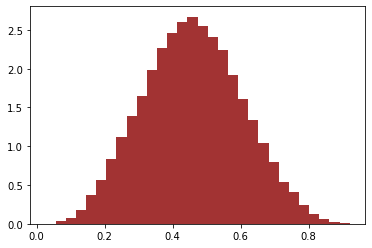

In [180]:
plt.hist(thetas[20000:], histtype='stepfilled', 
         color = 'darkred', bins=30, alpha=0.8, density=True);

In [181]:
np.mean(thetas[20000:])

0.4588372735106771

In [170]:
nCr(10,10)

1.0

In [190]:
thetas_2 = Metropolis_hastings(theta_2, 10, 4, 21, 15)

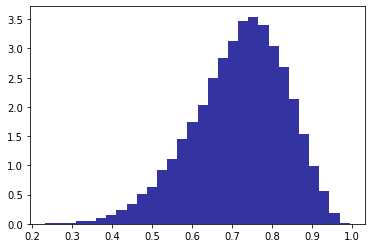

In [191]:
plt.hist(thetas_2[50000:], histtype='stepfilled', 
         color = 'darkblue', bins=30, alpha=0.8, density=True);

In [192]:
thetas_2 = Metropolis_hastings(theta_2, 10, 4, 21, 15)
print(np.mean(thetas_2))

0.7153680246359329
